<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 2: Machine Learning for Malware Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 35 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been given a large sample of derived malware features that describe 14 different malware variants (2000 samples of each). The purpose of this task is to understand the underlying concepts of classification, and **your task will be to develop two classifiers that can classify malware varients**. The first part will focus on a small hand-made classifier using only 3 malware classes, to understand the principles of search space and minimisation of a function. The second part will focus on using off-the-shelf libraries to scale up the classification to all 14 classes of malware present in the dataset.

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

**Part 1: Developing a Classifier "by hand" - (Total Marks: 20)**

* **Task 1:** Find the Centroid point of each of the three groups (3)
* **Task 2:** Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)
* **Task 3:** For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)
* **Task 4:** Provide a final accuracy score for the performance of your "by hand" classifier (2)

**Part 2: Developing a large-scale ML classifier - (Total Marks: 15)**

* **Task 5:** Scale the Input Features for further processing using the StandardScaler function (1)
* **Task 6:** Obtain numerical labels for each class using the LabelEncoder function (1)
* **(Advanced) Task 7:** Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)
* **(Advanced) Task 8:** Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 9:** Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 10:** Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
features = pd.read_csv('./T2_data/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [4]:
labels = pd.read_csv('./T2_data/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


In the cells above, we have created two DataFrames: ***features*** and ***labels***.

***Features***: This table contains 28000 instances of malware, where each instance of malware is characterised by 256 distinct features relating to how it performs and its impact on the associated systems.

***Labels***: This table contains 28000 rows, where each row is the label of the malware class, related to the features table. There are 2000 samples of each malware varient, and 14 varients in total.

## Part 1: Developing a Classifier "by hand"

In [5]:

# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.


mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


### Task 1: Find the Centroid point of each of the three groups (3)

In [6]:
# ANSWER
wannacry_centroid_x = train_data.loc[train_data['labels'] == 'wannacry'].x.sum()/50
wannacry_centroid_y = train_data.loc[train_data['labels'] == 'wannacry'].y.sum()/50

startsurf_centroid_x = train_data.loc[train_data['labels'] == 'startsurf'].x.sum()/50
startsurf_centroid_y = train_data.loc[train_data['labels'] == 'startsurf'].y.sum()/50

razy_centroid_x = train_data.loc[train_data['labels'] == 'razy'].x.sum()/50
razy_centroid_y = train_data.loc[train_data['labels'] == 'razy'].y.sum()/50

print('Centroids of Wannacry Label: ', wannacry_centroid_x,',',wannacry_centroid_y)

print('Centroids of startsurf Label: ', startsurf_centroid_x,',',startsurf_centroid_y)

print('Centroids of razy Label: ', razy_centroid_x,',',razy_centroid_y)



Centroids of Wannacry Label:  2181660.66 , 11087.1
Centroids of startsurf Label:  478778.12 , 3754.04
Centroids of razy Label:  100505.22 , 6158.28


### Task 2: Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)

<Figure size 1440x720 with 0 Axes>

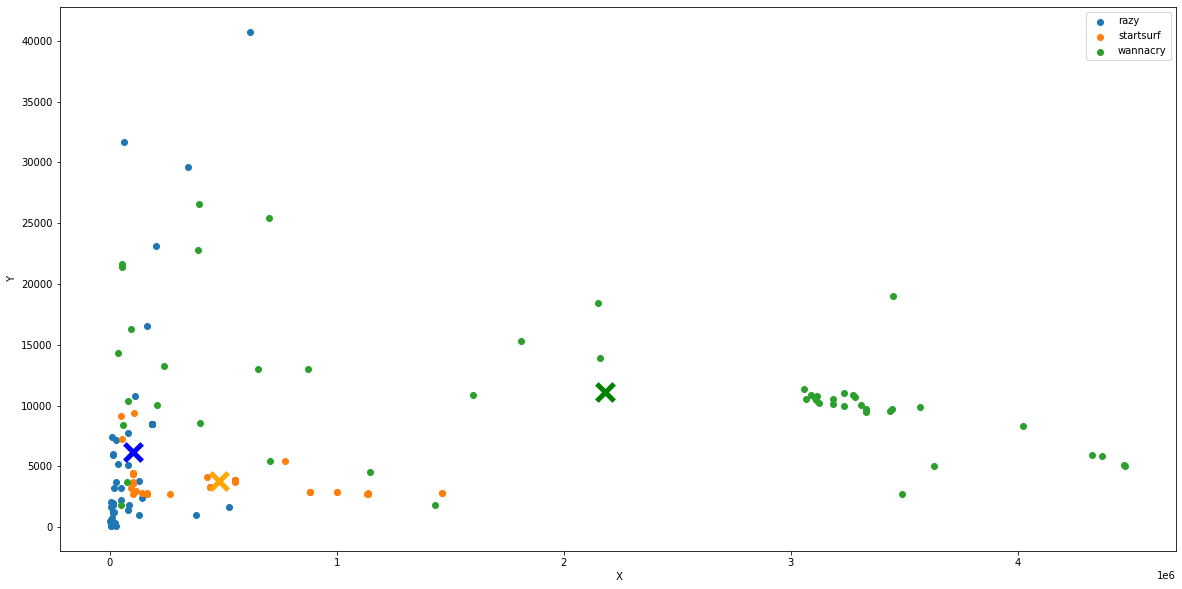

In [7]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20, 10))
scatter_x = np.array(train_data['x'])
scatter_y = np.array(train_data['y'])
group = np.array(train_data.labels)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)

plt.scatter(wannacry_centroid_x, wannacry_centroid_y,  marker = "x", s=300, 
    linewidths = 5, zorder = 10, c='green')
plt.scatter(startsurf_centroid_x, startsurf_centroid_y,  marker = "x", s=300, 
    linewidths = 5, zorder = 10, c='orange')
plt.scatter(razy_centroid_x, razy_centroid_y,  marker = "x", s=300, 
    linewidths = 5, zorder = 10, c='blue')
ax.legend()
plt.xlabel(' X')
plt.ylabel(' Y')
plt.show()

### Task 3: For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task*



In [135]:
distances_c1 = []
distances_c2 = []
distances_c3 = []
predicted_label=[]
for i in range(len(test_data)):
    distances_c1.append((test_data.x[i] - wannacry_centroid_x)**2 +(test_data.y[i]- wannacry_centroid_y)**2)
    distances_c2.append((test_data.x[i] - startsurf_centroid_x)**2 +(test_data.y[i]- startsurf_centroid_y)**2)
    distances_c3.append((test_data.x[i] - razy_centroid_x)**2 +(test_data.y[i]- razy_centroid_y)**2)
    if(distances_c1[i]<=distances_c2[i] and distances_c1[i]<=distances_c3[i]):
        predicted_label.append('wannacry')
    elif(distances_c2[i]<=distances_c1[i] and distances_c2[i]<=distances_c3[i]):
        predicted_label.append('startsurf')
    elif(distances_c3[i]<=distances_c1[i] and distances_c3[i]<=distances_c2[i]):
        predicted_label.append('razy')
        
se = pd.Series(predicted_label)
test_data['predicted_label'] = se.values


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier (2)

In [154]:
count_of_correct_classification = len(test_data.loc[test_data['predicted_label'] == test_data['labels']])
count_of_test_data = len(test_data)

print('Accuracy score of hand made classifier is: ',count_of_correct_classification/count_of_test_data*100,'%')


Accuracy score of hand made classifier is:  70.0 %


In [155]:
# ANSWER
print('Accuracy score of hand made classification is: ',accuracy_score(test_data['predicted_label'] ,test_data['labels'])*100,'%')

Accuracy score of hand made classification is:  70.0 %


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification.

### Task 5: Scale the Input Features for further processing using the StandardScaler function (1)

In [78]:
# ANSWER
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(features.values)
scaled_features_df = pd.DataFrame(scaled_features, index=features.index, columns=features.columns)
scaled_features_df.head()



,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.097820,0.672159,0.826630,0.380661,0.647650,0.204495,0.792002,0.691117,1.028243,0.432558,...,0.191715,0.044177,0.845365,-0.010620,0.038420,0.068183,1.190714,0.135741,0.178144,0.406173
1,-0.355085,-0.291567,-0.274569,-0.254820,-0.323318,-0.234858,-0.178266,-0.244002,-0.310024,-0.182924,...,-0.155188,-0.155994,-0.248598,-0.175093,-0.166129,-0.179846,-0.248456,-0.168900,-0.218099,-0.238666
2,-0.351784,0.379844,0.241558,0.279985,0.178160,0.423038,0.259812,0.314504,0.202153,1.361289,...,0.543863,0.536584,0.422895,0.475873,0.359192,0.384618,0.260011,0.210779,0.192024,-0.230729
3,-0.373671,-0.408634,-0.418818,-0.451310,-0.434547,-0.405185,-0.364900,-0.422724,-0.506936,-0.419373,...,-0.411219,-0.363332,-0.464176,-0.352293,-0.315456,-0.353466,-0.429556,-0.312311,-0.303149,-0.268583
4,-0.375965,-0.363170,-0.384699,-0.382059,-0.402040,-0.327008,-0.317989,-0.328030,-0.433797,-0.295563,...,-0.278888,-0.254445,-0.370648,-0.250806,-0.230890,-0.258994,-0.365838,-0.264363,-0.302941,-0.268201


### Task 6: Obtain numerical labels for each class using the LabelEncoder function (1)



In [79]:
# ANSWER
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
label_encoded=  pd.Series(le.fit_transform(labels))
label_encoded

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0         7
1         7
2         7
3         7
4         7
         ..
27995    13
27996    13
27997    13
27998    13
27999    13
Length: 28000, dtype: int64

### (Advanced) Task 7: Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)

In [80]:
# ANSWER

from sklearn.model_selection import train_test_split

  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df,label_encoded ,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21000, 256), (7000, 256), (21000,), (7000,))

### (Advanced) Task 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [81]:
# ANSWER
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8254285714285714

In [82]:
print('Accuracy Score of MLP Classifier is: ',accuracy_score(y_test, y_pred)*100,'%')

Accuracy Score of MLP Classifier is:  82.54285714285714 %


### (Advanced) Task 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [83]:
# ANSWER
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
# Predicting 
y_pred = rfc.predict(X_test)

In [84]:
print('Model accuracy score with default decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100),'%')

Model accuracy score with default decision-trees : 87.9286 %


### (Advanced) Task 10: Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

*Marks wil be awarded for how your tuning improves accuracy beyond 80%.*

Accuracy score is already above 80% for both classifiers. Good classification depends on following factors

- **Data Normalization**
  
  We stadandardize our data for normalization and avoided feature dominance by any of the feature.

- **Good split bwtween training and test data to avoid over and underfitting**


  We divided the dataset in to 75/25% training and test dataset. It is a good split and minimizes overfitting and underfitting in the classification.

- If our accuracy was below 80% in the MLP classifier, we could have added hidden layers to improve accuracy. 

- If our accuracy was below 80% in the Random Forest classifier, we could have increased n_estimators to improve accuracy. 



In [85]:
# ANSWER
mlp = MLPClassifier(hidden_layer_sizes=(90,90,90))
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
print('Accuracy Score of MLP Classifier with hidden layers is: ',accuracy_score(y_test, y_pred)*100,'%')

Accuracy Score of MLP Classifier with hidden layers is:  83.6 %


In [87]:
# ANSWER
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42,criterion='entropy')
rfc.fit(X_train, y_train)
# Predicting 
y_pred = rfc.predict(X_test)

In [88]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100),'%')

Model accuracy score with 100 decision-trees : 87.7143 %
